In [1]:
#import the Standard libries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')


In [2]:
#load the data using pandas read functions
data=pd.read_csv('C://Users//Admin//Downloads//archive (3)//Sleep_health_and_lifestyle_dataset.csv')
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
# Drop the person id columns
data=data.drop('Person ID',axis=1)

In [4]:
#Checking the data shape
print(f"The data set contains {data.shape[1]} columns  and rows are {data.shape[0]}")

The data set contains 12 columns  and rows are 374


In [5]:
# All the columns information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 35.2+ KB


In [6]:
#Checking the Null values
data.isna().sum()/len(data.shape)*100

Gender                     0.0
Age                        0.0
Occupation                 0.0
Sleep Duration             0.0
Quality of Sleep           0.0
Physical Activity Level    0.0
Stress Level               0.0
BMI Category               0.0
Blood Pressure             0.0
Heart Rate                 0.0
Daily Steps                0.0
Sleep Disorder             0.0
dtype: float64

In [7]:
data.describe().style.background_gradient(cmap='nipy_spectral')

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


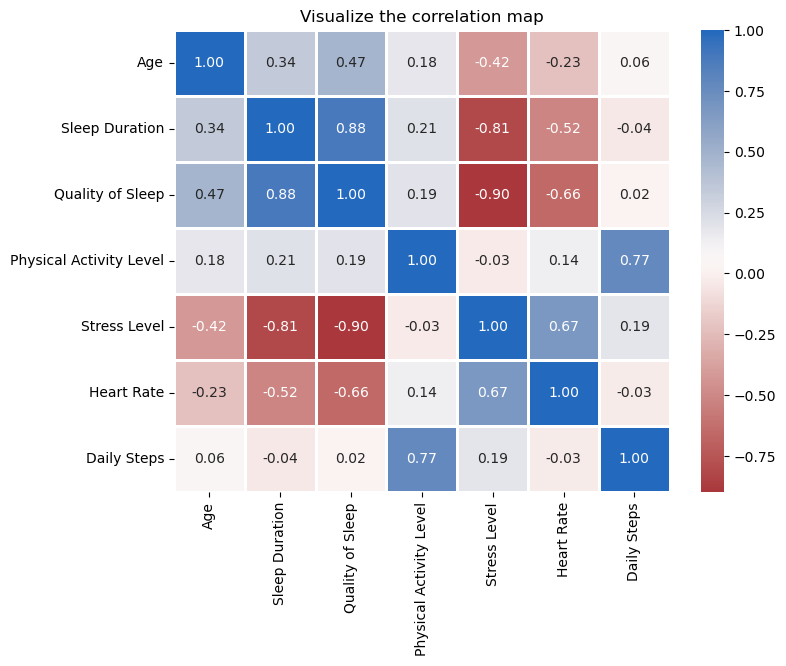

In [8]:
#Visualize the Correlation map
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(),cmap='vlag_r',annot=True,fmt='.2f',linewidths=1)
plt.title("Visualize the correlation map")
plt.show()

# Explore Data Analysis

### Questions Asked for data:
- Sleep Disorder Percentage:
- Gender Percentage in the Data using a pie chart:
- Distribution of Age using a histogram
- Determine the highest occupation in the dataset.
- Analyze the distribution of sleep duration based on gender.
- Visualize the average sleep duration across different occupations using a bar chart.
- Explore the relationship between average sleep duration and BMI category.
- Identify the dominant occupation within the male category.
- Find the Average Heart with Bmi category

<AxesSubplot:title={'center':'Sleep Disorder percentage in the data'}, ylabel='Sleep Disorder'>

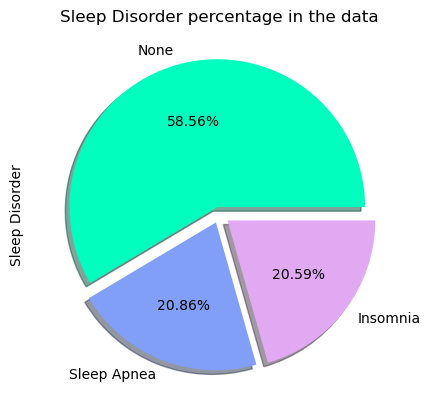

In [9]:
# Find the Sleep disorder percentage
data['Sleep Disorder'].value_counts(normalize=True).sort_values(ascending=False)\
.plot(kind='pie',title="Sleep Disorder percentage in the data",explode=[0.05,0.06,0.07],
    labels=['None','Sleep Apnea','Insomnia'],
    colors=['#00FFBF','#819FF7','#E2A9F3'],
    autopct='%1.2f%%',
    shadow=True)

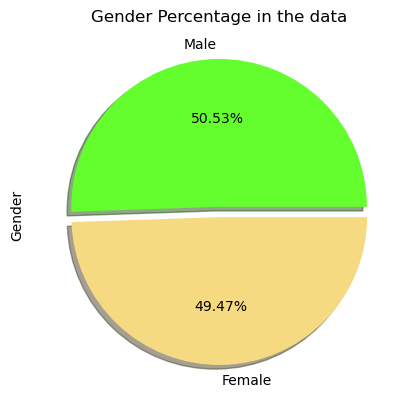

In [10]:
# Find the Gender Percentage using data
data['Gender'].value_counts(normalize=True).sort_values(ascending=False)\
.plot(kind='pie',title="Gender Percentage in the data",explode=[0.05,0.02],
    labels=['Male','Female'],
    colors=['#64FE2E','#F5DA81'],
    autopct='%1.2f%%',
    shadow=True)
plt.show()

#### Observations:
- From the above two pie charts, we can observe several pieces of information. 
- Firstly, the highest percentage in the sleep disorder pie chart is "None," indicating that a significant portion of the data does not have reported sleep disorders. The second-highest sleep disorder category is "Sleep Apnea."

- In the second pie chart depicting gender percentages, the male percentage is higher compared to the female percentage.

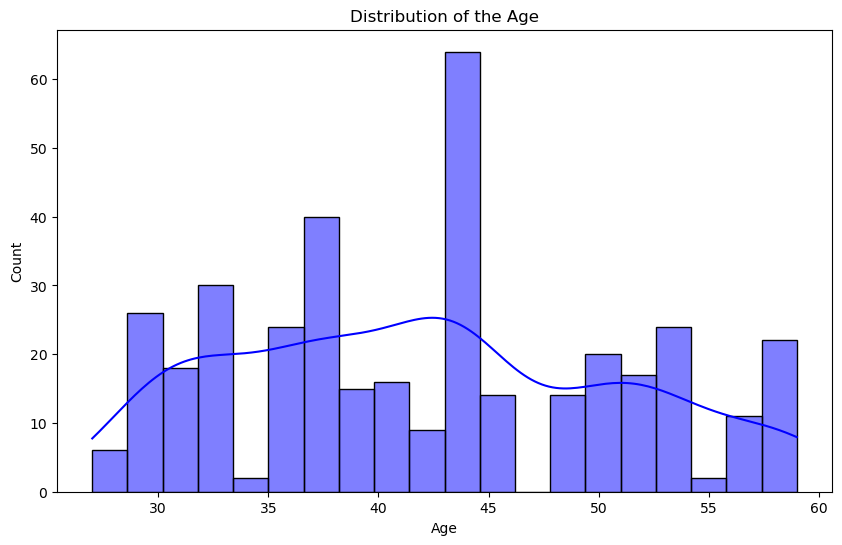

In [11]:
#Distribution of the age columns
plt.figure(figsize=(10,6))
sns.histplot(data=data,x='Age',stat='count',bins=20,kde=True,color='b')
plt.title("Distribution of the Age")
plt.show()

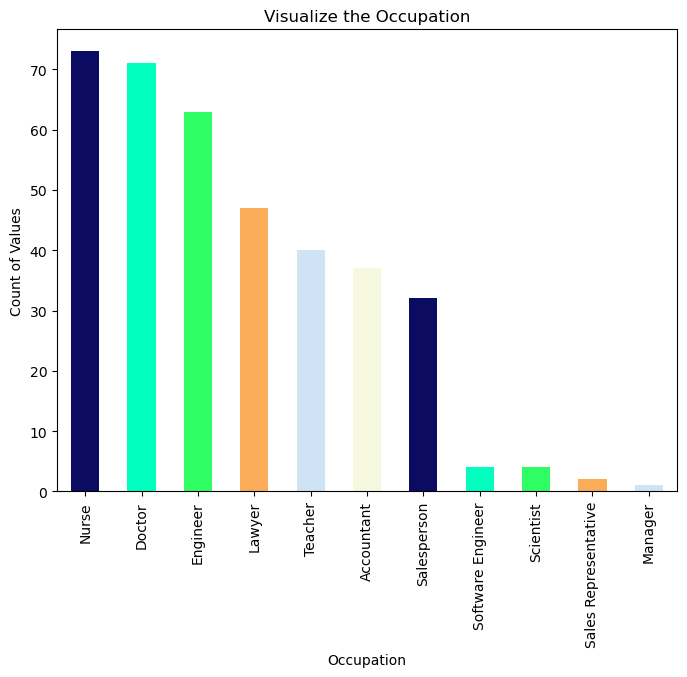

In [12]:
#Count of the occupation in the data using the bar plot
data['Occupation'].value_counts().sort_values(ascending=False)\
.plot(kind='bar',title="Visualize the Occupation",figsize=(8,6),color=['#0B0B61','#00FFBF','#2EFE64','#FAAC58','#CEE3F6','#F7F8E0'])
plt.xlabel('Occupation')
plt.ylabel('Count of Values')
plt.show()

### Observations:
- From the above two charts, one being a histogram and the other a bar chart, we can observe the following patterns:
- In the age histogram, there is a noticeable repetition of the age 43, indicating that a significant number of individuals in the dataset fall within this age range.
- In the bar chart, we can determine that the most demanding job based on the dataset is "Nurse," while the least demanding job is "Manager."

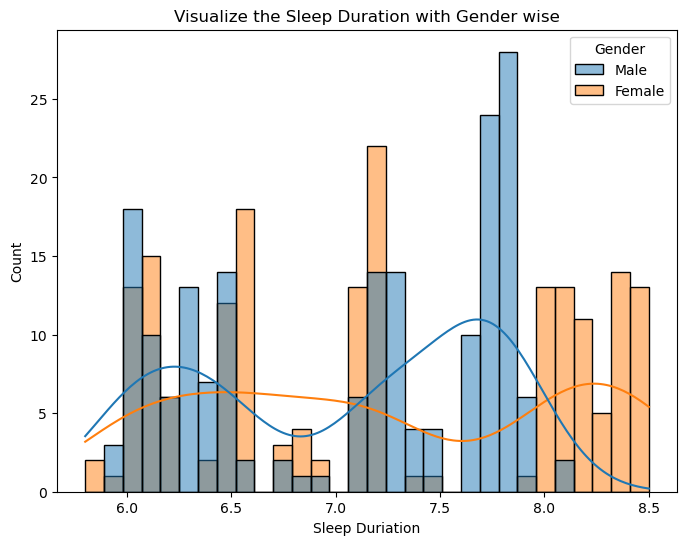

In [13]:
#Visualize the Sleep Duration with Gender wise
plt.figure(figsize=(8,6))
sns.histplot(data=data,x='Sleep Duration',bins=30,kde=True,hue='Gender')
plt.title("Visualize the Sleep Duration with Gender wise")
plt.xlabel("Sleep Duriation")
plt.ylabel("Count")
plt.show()

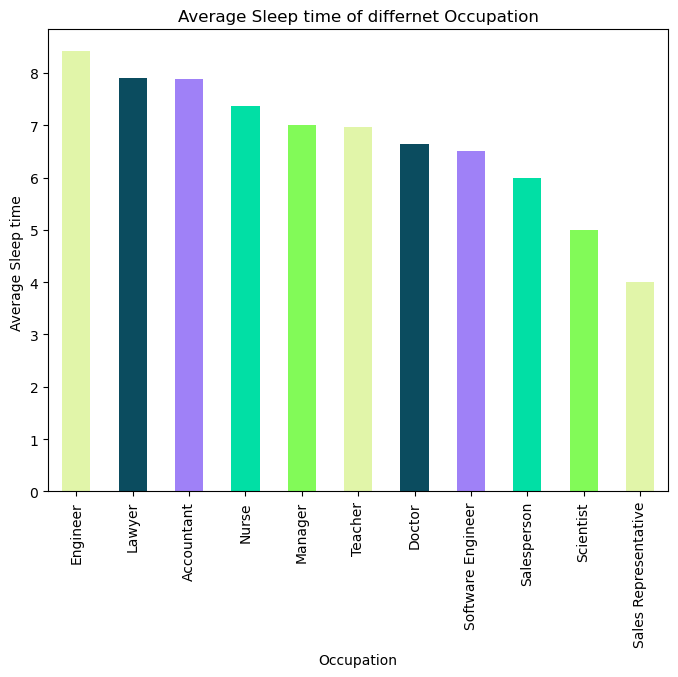

In [14]:
#Find the Average Sleep time of the Different Occupations
data.groupby('Occupation')['Quality of Sleep'].mean().sort_values(ascending=False)\
.plot(kind='bar',title="Average Sleep time of differnet Occupation",figsize=(8,6),color=['#E1F5A9','#0B4C5F','#9F81F7','#01DFA5','#82FA58'])
plt.xlabel("Occupation")
plt.ylabel("Average Sleep time ")
plt.show()

### Observations:
- From the two charts, we can analyze the average sleep duration based on gender and the quality of sleep based on different occupations.

- According to the histogram chart, the average sleep duration for males is approximately 7.7 hours, while for females, it is around 8.5 hours.

- In the bar chart, it is evident that the occupation "Engineer" has the highest sleep quality among the different roles, while the occupation "Sales Representative" has the lowest sleep quality.

In [15]:
#Some intresting questions asked in the data
#Gender imbalance
imbalanced_data=data['Gender'].value_counts()[0]/data['Gender'].value_counts()[1]
print('\nGender Imbalance',imbalanced_data)
#find the which is the dominate_occupation in the data
dominate_occupation=data['Occupation'].value_counts().idxmax()
print("\nDominate_occupation",dominate_occupation)
#find the least demanding job
least_demanding_job=data['Occupation'].value_counts().idxmin()
print("\nThe Least demanding_job",least_demanding_job)
# find the top 5 strees level 
top_5_stress_level=data['Stress Level'].value_counts().nlargest(5)
print("\nCommon stress pattern",top_5_stress_level)
#find the age range in the data
age_range=(data['Age'].min(),data['Age'].max())
print("\nAge Range",age_range)
# find the daily steps in the data 
daily_steps=(data['Daily Steps'].min(),data['Daily Steps'].max())
print("\nRange of the Daily_steps",daily_steps)
# find the skewss of the sleep durations
sleep_quality_skewness=data['Sleep Duration'].value_counts().skew()
print("\nSleep Quality Skewness:", sleep_quality_skewness)


Gender Imbalance 1.0216216216216216

Dominate_occupation Nurse

The Least demanding_job Manager

Common stress pattern 3    71
8    70
4    70
5    67
7    50
Name: Stress Level, dtype: int64

Age Range (27, 59)

Range of the Daily_steps (3000, 10000)

Sleep Quality Skewness: 0.7855254005718885


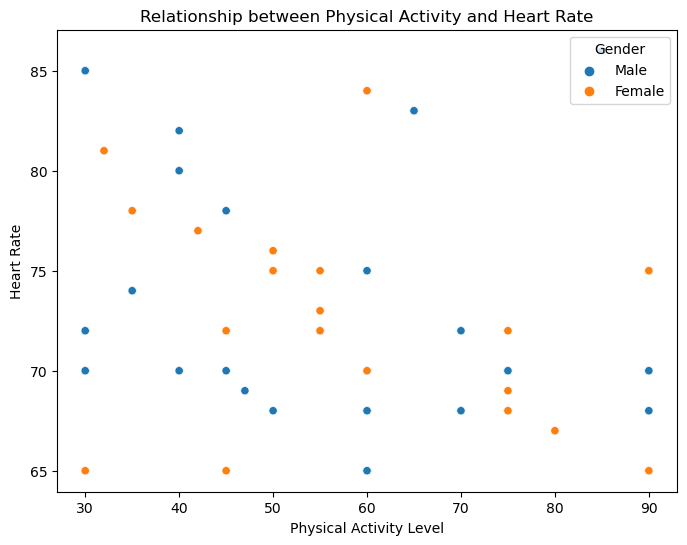

In [16]:
#Visualize the Physical Activity with Heart Rate on Gender
plt.figure(figsize=(8,6))
sns.scatterplot(data=data,x='Physical Activity Level',y='Heart Rate',hue='Gender')
plt.title("Relationship between Physical Activity and Heart Rate")
plt.show()

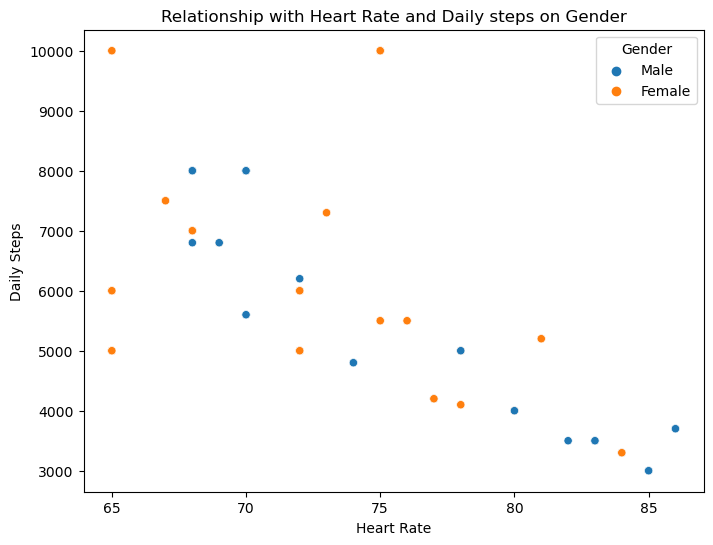

In [17]:
# Find the Relationship between Heart Rate with Daily steps on gender
plt.figure(figsize=(8,6))
sns.scatterplot(data=data,x='Heart Rate',y='Daily Steps',hue='Gender')
plt.title("Relationship with Heart Rate and Daily steps on Gender")
plt.show()

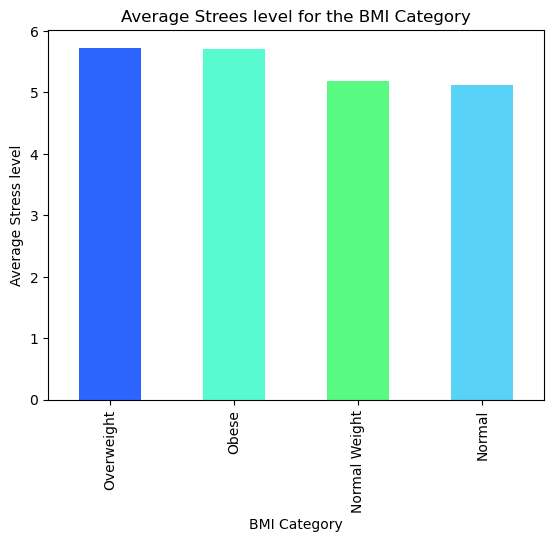

In [18]:
#Find the average Stress level the BMI Category wise
data.groupby('BMI Category')['Stress Level'].mean().sort_values(ascending=False)\
.plot(kind='bar',title='Average Strees level for the BMI Category',color=['#2E64FE','#58FAD0','#58FA82','#58D3F7'])
plt.xlabel("BMI Category")
plt.ylabel("Average Stress level")
plt.show()

In [19]:
#Find the averages daily steps with BMI Category on Gender using pivot_table
pd.pivot_table(data=data,index='Gender',values='Daily Steps',columns='BMI Category',aggfunc='mean').style.background_gradient(cmap='gist_heat')

BMI Category,Normal,Normal Weight,Obese,Overweight
Gender,,,,
Female,6000.000000,6578.571429,3300.000000,7416.037736
Male,7320.610687,7142.857143,3355.555556,5828.571429


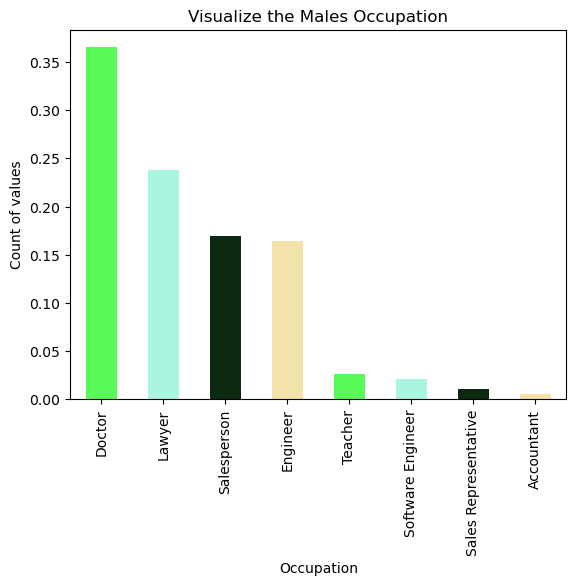

In [20]:
#Find the which is most demand occupation in male category
data.loc[data['Gender']=='Male']['Occupation'].value_counts(normalize=True)\
.plot(kind='bar',title="Visualize the Males Occupation",color=['#58FA58','#A9F5E1','#0A2A12','#F3E2A9'])
plt.xlabel('Occupation')
plt.ylabel("Count of values")
plt.show()

### Observations:
- From the above chart, we can observe an interesting pattern where overweight people tend to have higher stress levels, while normal-weight individuals have lower stress levels.

- Regarding the dominance of job roles in the male gender, it can be seen that the "Doctor" profession is the most dominating job, while the "Accountant" role is relatively less dominant.

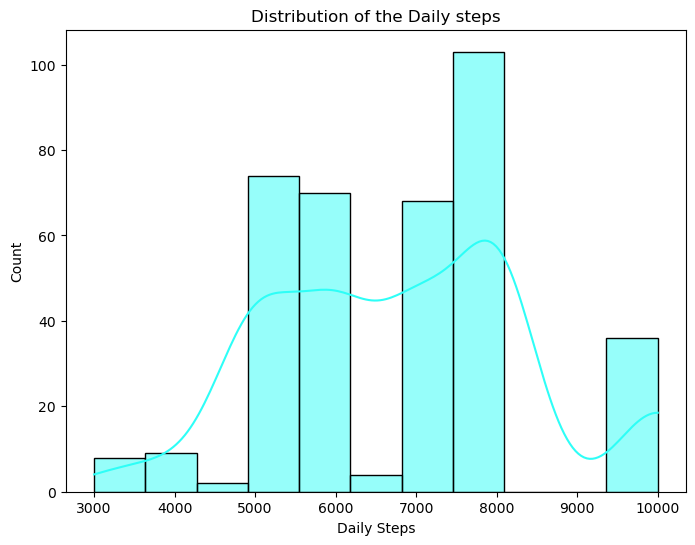

In [21]:
# Create a histogram for distributing the averages Daily steps
plt.figure(figsize=(8,6))
sns.histplot(data['Daily Steps'],bins='auto',color=['#2EFEF7'],kde=True)
plt.title("Distribution of the Daily steps")
plt.show()

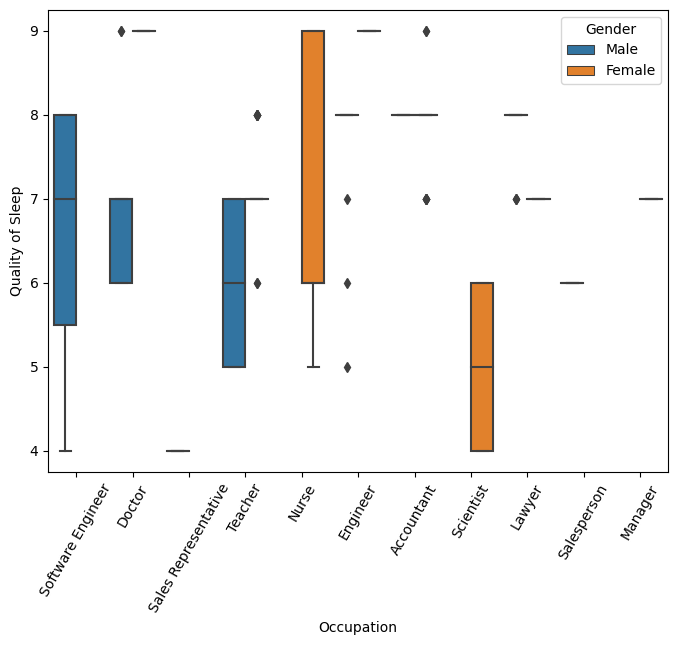

In [22]:
#Create a boxplot for occupation and quality of sleep on gender
plt.figure(figsize=(8,6))
sns.boxplot(data=data,x='Occupation',y='Quality of Sleep',hue='Gender',)
plt.xlabel("Occupation")
plt.ylabel("Quality of Sleep")
plt.xticks(rotation=60)
plt.show()

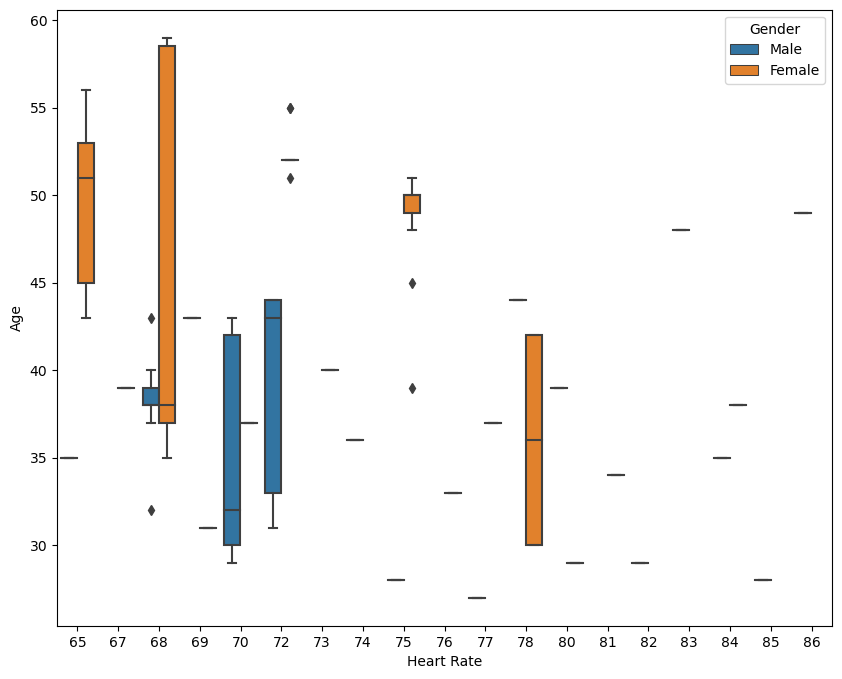

In [23]:
#Visualize the boxplot with heart rate with age on gender
plt.figure(figsize=(10,8))
sns.boxplot(data=data,x='Heart Rate',y='Age',hue='Gender')
plt.xlabel("Heart Rate")
plt.ylabel("Age")
plt.show()

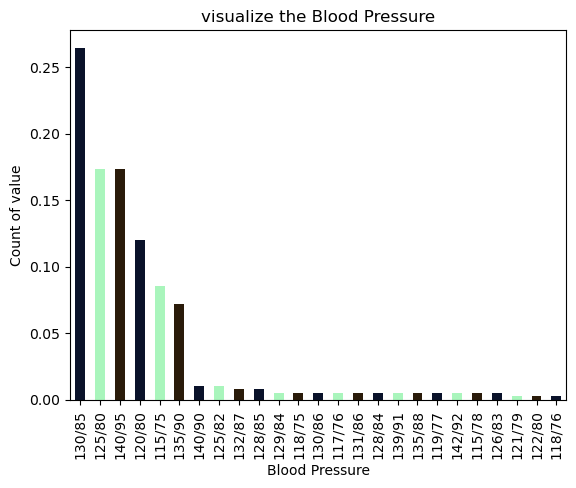

In [24]:
#Crete a bar chart with blood Pressure
data['Blood Pressure'].value_counts(normalize=True).sort_values(ascending=False)\
.plot(kind='bar',title="visualize the Blood Pressure",color=['#0A122A','#A9F5BC','#2A1B0A'])
plt.xlabel("Blood Pressure")
plt.ylabel("Count of value")
plt.show()

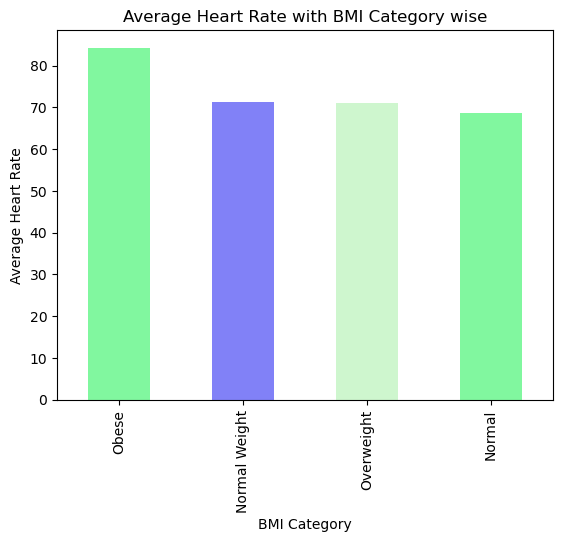

In [25]:
#Find the Averate heart rate with Bmi category wise
data.groupby('BMI Category')['Heart Rate'].mean().sort_values(ascending=False)\
.plot(kind='bar',title='Average Heart Rate with BMI Category wise',color=['#81F79F','#8181F7','#CEF6CE'])
plt.xlabel("BMI Category")
plt.ylabel("Average Heart Rate")
plt.show()

In [26]:
#Find the Average sleep duration with occupation with BMI Category on sleep Duration
data.groupby(['Occupation','BMI Category'])['Sleep Duration'].mean().sort_values(ascending=False)\
.unstack()\
.style.background_gradient(cmap='gist_heat_r')

BMI Category,Normal,Normal Weight,Obese,Overweight
Occupation,,,,
Accountant,7.161538,7.520000,nan,6.566667
Doctor,6.887692,8.200000,7.700000,nan
Engineer,8.080357,7.450000,nan,6.966667
Lawyer,7.438095,6.900000,7.400000,7.100000
Manager,nan,nan,nan,6.900000
Nurse,nan,6.900000,nan,7.080303
Sales Representative,nan,nan,5.900000,nan
Salesperson,nan,nan,nan,6.403125
Scientist,nan,nan,nan,6.000000


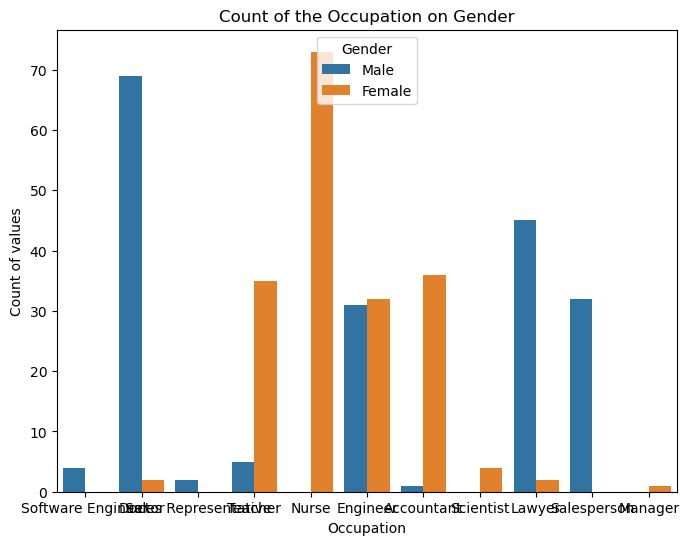

In [27]:
#Create a countplot for occupation on the gender
plt.figure(figsize=(8,6))
sns.countplot(data=data,x='Occupation',hue='Gender')
plt.title("Count of the Occupation on Gender")
plt.xlabel("Occupation")
plt.ylabel("Count of values")
plt.show()

# Machine Learning Modeling  

In [28]:
from sklearn.model_selection import train_test_split,GridSearchCV,ShuffleSplit
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

In [29]:
#Covert the Categorical Columns to into numerical values
for col in data.select_dtypes(include='object'):
    label_encoder=LabelEncoder()
    label_encoder.fit(data[col].unique())
    data[col]=label_encoder.transform(data[col])

In [30]:
# Divided into the data into dependent and independent variables
X=data.drop(['Sleep Disorder'],axis=1)
y=data['Sleep Disorder']
#Scaling the values
scaler=MinMaxScaler()
scaler.fit(X)
X=scaler.fit_transform(X)
# Split the data into train and test 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=200)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(261, 11)
(113, 11)
(261,)
(113,)


In [31]:
algo={
    'logistic_regression': {
        'model': LogisticRegression(),
        'params': {
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy', 'log_loss'],
            'splitter': ['best','random']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [1,5,10,20,50],
            'criterion': ['gini', 'entropy', 'log_loss']
        }
    },
    'ada_boost_classifier': {
        'model': AdaBoostClassifier(),
        'params': {
            'n_estimators': [1,5,10,20,50,100]
        }
    },
    'gradient_boosting_classifier': {
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [1,5,10,20,50,100],
        }
    },
    'xbgclassifier': {
        'model': XGBClassifier(),
        'params': {
            'n_estimators': [1,5,10,20,50]
        }
    },
    'cat_boost_calssifier': {
        'model': CatBoostClassifier(),
        'params': {
            'iterations':[1]
        }
    },
    'knn_classifier': {
        'model': KNeighborsClassifier(),
        'params': {
        }
    }
}


In [32]:
score=[]
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)
for algo_name,mp in algo.items():
    grid=GridSearchCV(mp['model'],mp['params'],cv=cv,return_train_score=False)
    grid.fit(X,y)
    score.append({
        'model':algo_name,
        'best_score':grid.best_score_,
        'best_params':grid.best_params_
    })

Learning rate set to 0.5
0:	learn: 0.6587861	total: 136ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.6686615	total: 3.69ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.6705082	total: 2.65ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.6458583	total: 3.04ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.6547457	total: 1.61ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.6587434	total: 2.13ms	remaining: 0us


In [33]:
#Create a data frame for the 
score=pd.DataFrame(score,columns=['model','best_score','best_params'])
score.head()

,model,best_score,best_params
0,logistic_regression,0.877333,{}
1,SVM,0.882667,{}
2,decision_tree,0.874667,"{'criterion': 'entropy', 'splitter': 'random'}"
3,random_forest,0.896000,"{'criterion': 'gini', 'n_estimators': 10}"
4,ada_boost_classifier,0.858667,{'n_estimators': 5}


In [34]:
#Imblanced the data set and create a function for the machine learning model
from imblearn.combine import SMOTETomek
sm=SMOTETomek()
X_train_sm,y_train_sm=sm.fit_resample(X_train,y_train)
def model_buliding(model,X_train,X_test,y_train,y_test):
    model.fit(X_train_sm,y_train_sm)
    y_pred=model.predict(X_test)
    print(f'Accuracy score of the {model} is {accuracy_score(y_test,y_pred)*100:.2f}')
    print(classification_report(y_test,y_pred))
    confusion=confusion_matrix(y_test,y_pred)
    print(sns.heatmap(confusion,annot=True,cmap='gist_earth'))

Learning rate set to 0.5
0:	learn: 0.6650302	total: 2.71ms	remaining: 0us
Accuracy score of the <catboost.core.CatBoostClassifier object at 0x000002569D3DF970> is 85.84
              precision    recall  f1-score   support

           0       0.93      0.65      0.76        20
           1       0.86      0.94      0.90        69
           2       0.83      0.79      0.81        24

    accuracy                           0.86       113
   macro avg       0.87      0.79      0.82       113
weighted avg       0.86      0.86      0.85       113

AxesSubplot(0.125,0.11;0.62x0.77)


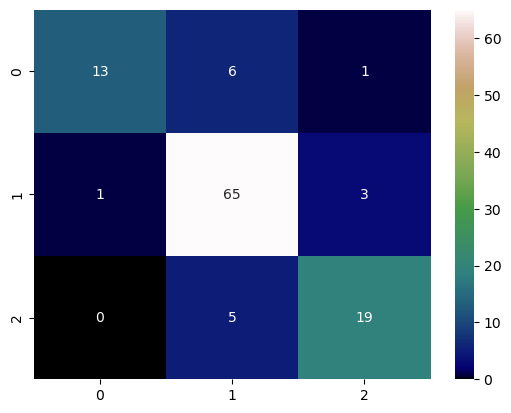

In [35]:
#Applying the Catboostclassifier
logistic=CatBoostClassifier(iterations=1)
model_buliding(logistic,X_train,X_test,y_train,y_test)

Accuracy score of the XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...) is 92.04
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        20
           1       0.97      0.94      0.96        69
           2       0.81      0.92      0.86  

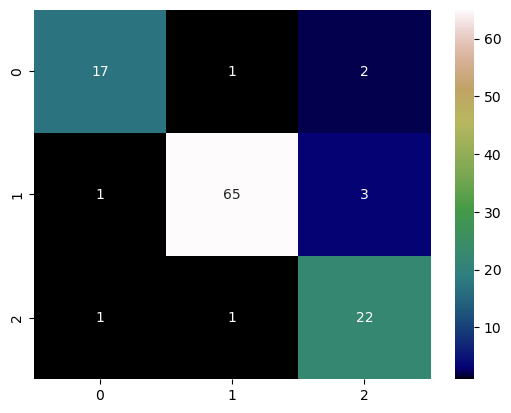

In [36]:
#Applying the Catboostclassifier
xgb=XGBClassifier()
model_buliding(xgb,X_train,X_test,y_train,y_test)

Accuracy score of the KNeighborsClassifier() is 88.50
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        20
           1       0.97      0.90      0.93        69
           2       0.76      0.92      0.83        24

    accuracy                           0.88       113
   macro avg       0.84      0.87      0.85       113
weighted avg       0.89      0.88      0.89       113

AxesSubplot(0.125,0.11;0.62x0.77)


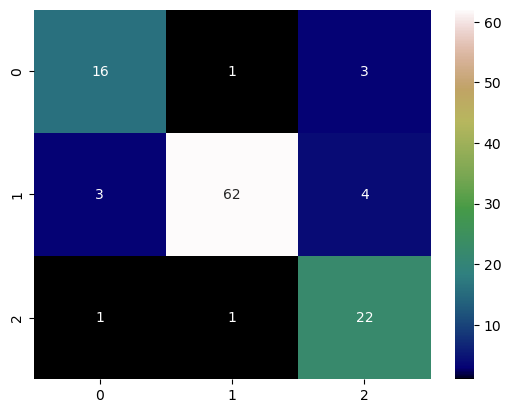

In [37]:
#Applying the Catboostclassifier
knn=KNeighborsClassifier()
model_buliding(knn,X_train,X_test,y_train,y_test)

Accuracy score of the GradientBoostingClassifier() is 92.04
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        20
           1       0.97      0.94      0.96        69
           2       0.81      0.92      0.86        24

    accuracy                           0.92       113
   macro avg       0.89      0.90      0.90       113
weighted avg       0.92      0.92      0.92       113

AxesSubplot(0.125,0.11;0.62x0.77)


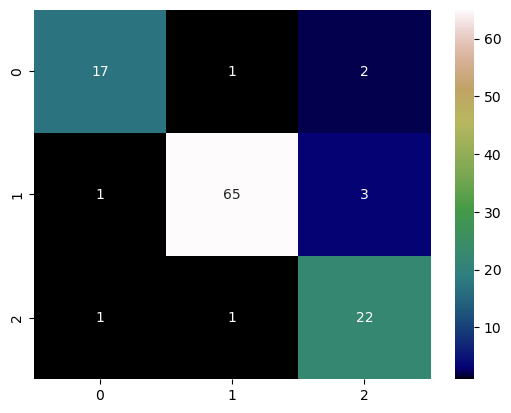

In [38]:
#Applying the Catboostclassifier
grad=GradientBoostingClassifier()
model_buliding(grad,X_train,X_test,y_train,y_test)

## Conclusion:
This is another project in data science where data is obtained from Kaggle. The usual data preprocessing steps are performed, including data cleaning. Exploratory data analysis (EDA) techniques are applied to gain insights from the data, and questions are formulated based on the analysis. Visualizations such as bar charts, pie charts, and other types of charts are created to present the findings. Machine learning algorithms, specifically GradientBoostingClassifier and XGBClassifier, are applied to the data, and they achieve high accuracy scores.